In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile


# Step 1: Reading and Understanding the Data


In [2]:
cars = pd.read_csv("C:\\Users\\abhij\\Downloads\\CarPrice_Assignment.csv")


In [3]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [5]:
cars.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


# Step 2 : Data Cleaning and Preparation¶


In [6]:
cars.drop(["car_ID", "symboling"], axis = 1, inplace=True)


In [7]:
cars["company_name"] = cars["CarName"].apply(lambda x: x.split(' ')[0])
cars.drop('CarName', axis = 1, inplace=True)


In [8]:
cars.head()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_name
0,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [9]:
cars.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [10]:
cars["company_name"] = cars["company_name"].str.lower()

cars["company_name"] = cars["company_name"].replace({'maxda':'mazda', 'toyouta':'toyota', 'porcshce':'porsche',
                                                     'vokswagen': 'volkswagen', 'vw':'volkswagen','Nissan':'nissan'})

In [11]:
cars.company_name.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [12]:
#Checking for duplicates
cars.duplicated().sum()

0

# Step 3: Visualizing the data


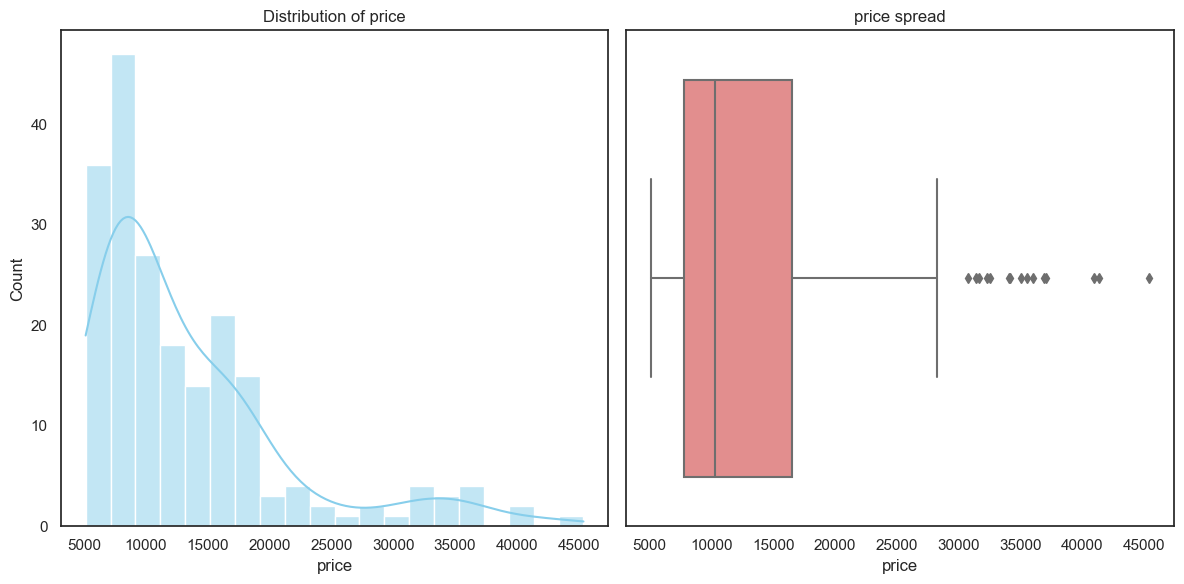

In [13]:
sns.set(style = "white")
fig, axis = plt.subplots(nrows = 1, ncols = 2, figsize = (12,6))


sns.histplot(cars["price"], bins = 20, kde = True, color = 'skyblue', ax = axis[0])
axis[0].set_title("Distribution of price")


sns.boxplot(x = 'price', data = cars, color = 'lightcoral', ax = axis[1])
axis[1].set_title("price spread")

plt.tight_layout()
plt.show()


In [14]:
print(cars.price.describe())

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64


# Visualising Categorical Data
- CompanyName
- fueltype
- enginetype
- carbody
- doornumber
- enginelocation
- fuelsystem
- cylindernumber
- aspiration
- drivewheel

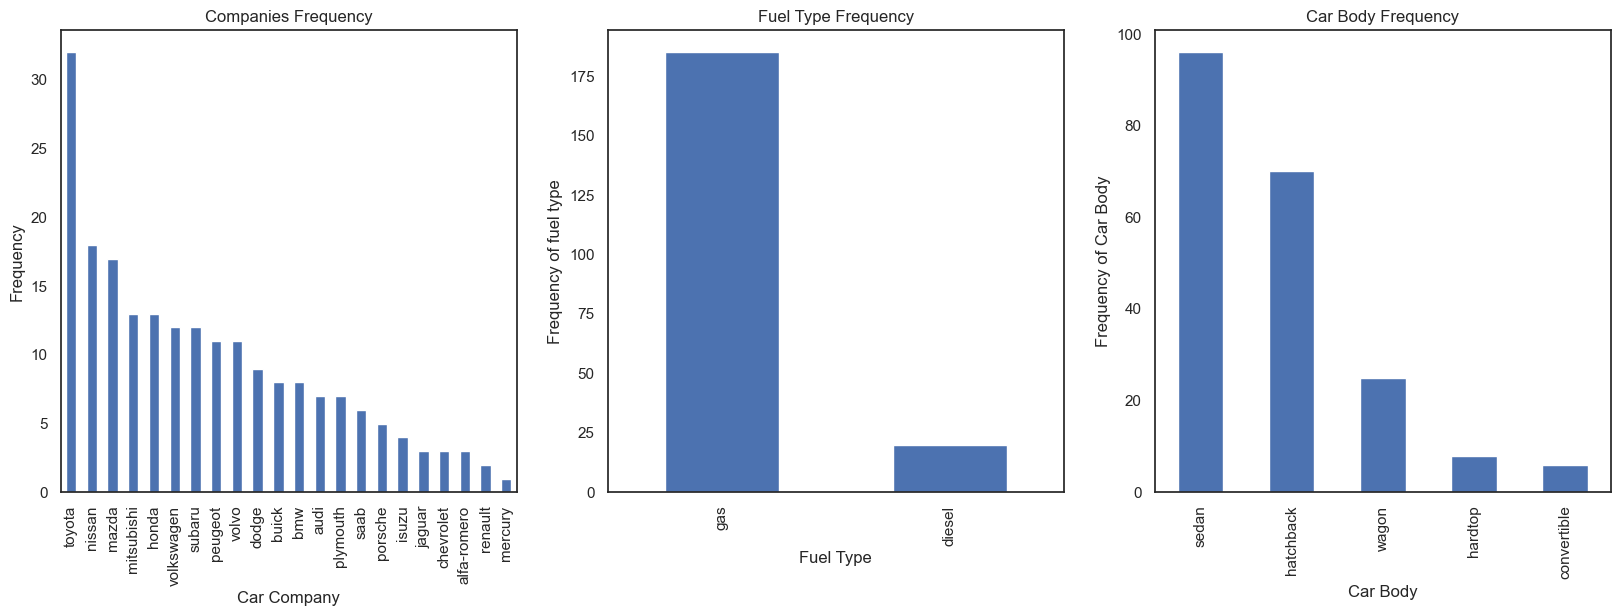

In [15]:
plt.figure(figsize = (20,6))

plt.subplot(1,3,1)
plot =  cars.company_name.value_counts().plot(kind = 'bar')
plt.title("Companies Frequency")
plot.set(xlabel = "Car Company", ylabel = 'Frequency')

plt.subplot(1,3,2)
plot = cars.fueltype.value_counts().plot(kind = 'bar')
plt.title("Fuel Type Frequency")
plot.set(xlabel = "Fuel Type", ylabel = 'Frequency of fuel type')


plt.subplot(1,3,3)
plot = cars.carbody.value_counts().plot(kind = 'bar')
plt.title("Car Body Frequency")
plot.set(xlabel = "Car Body", ylabel = 'Frequency of Car Body')

plt.show()


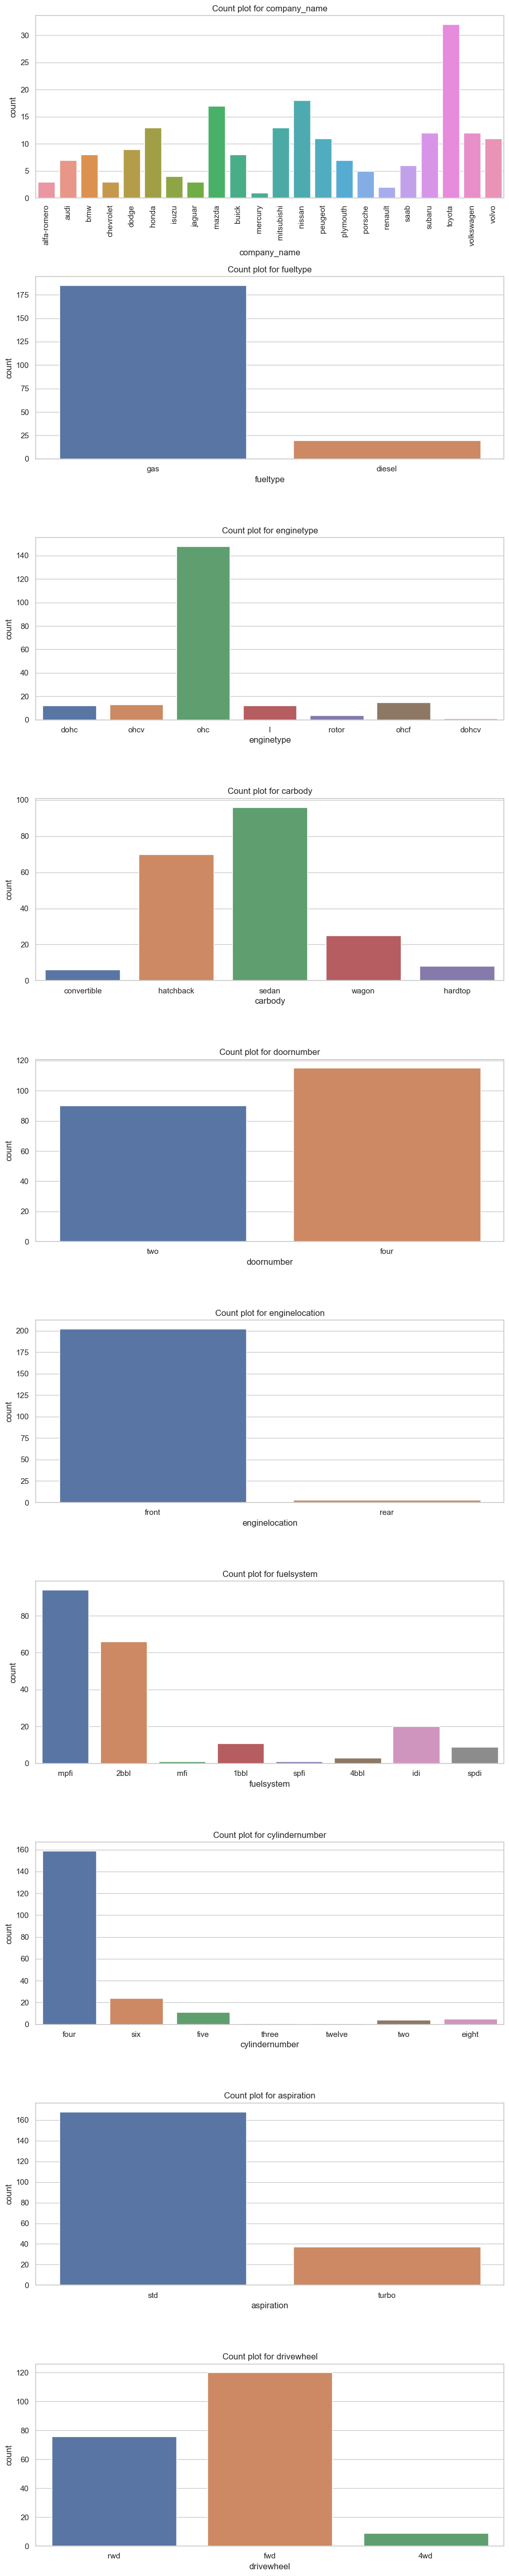

In [16]:
sns.set(style="whitegrid")

categorical_variables = ['company_name', 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

for i, variable in enumerate(categorical_variables):
    sns.countplot(x=variable, data=cars, ax=axes[i])
    axes[i].set_title(f'Count plot for {variable}')
    if variable == 'company_name':
        axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


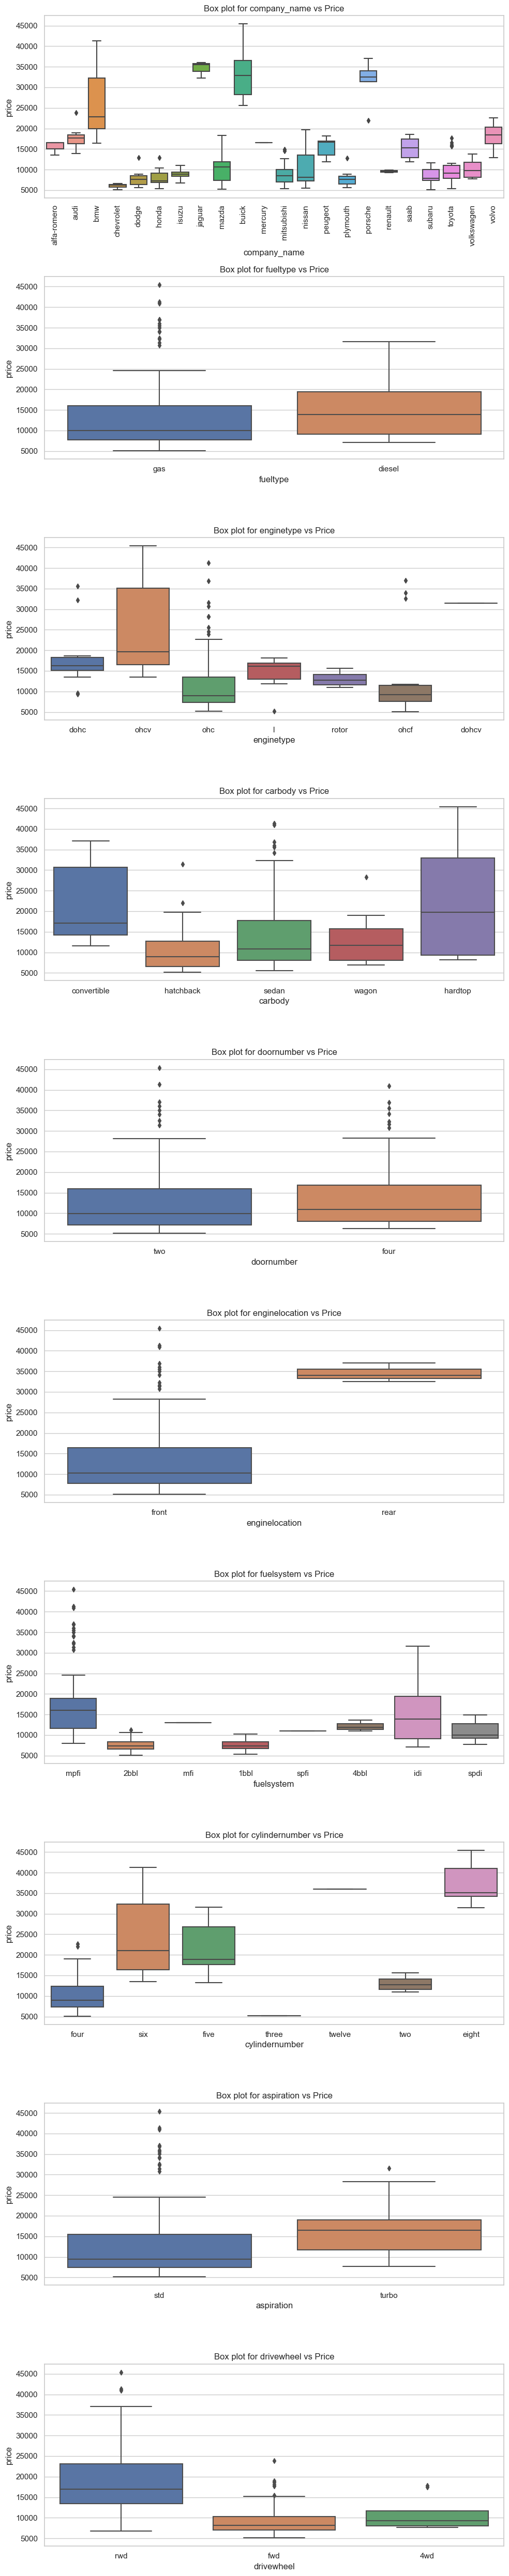

In [17]:
# Set the style for seaborn
sns.set(style="whitegrid")

# Define the categorical variables to visualize
categorical_variables = ['company_name', 'fueltype', 'enginetype', 'carbody',
                          'doornumber', 'enginelocation', 'fuelsystem', 'cylindernumber',
                          'aspiration', 'drivewheel']

# Create subplots for each categorical variable
fig, axes = plt.subplots(nrows=len(categorical_variables), ncols=1, figsize=(10, 5 * len(categorical_variables)))

# Plot box plots for each categorical variable against price
for i, variable in enumerate(categorical_variables):
    sns.boxplot(x=variable, y='price', data=cars, ax=axes[i])
    axes[i].set_title(f'Box plot for {variable} vs Price')
    if variable == 'company_name':
       axes[i].tick_params(axis='x', rotation=90)

# Adjust layout
plt.tight_layout()
plt.show()


Here are some insights :

1. CompanyName vs Price:

Some companies like 'bmw', 'jaguar', and 'mercedes-benz' tend to have higher average prices compared to others.
There is variation in prices among different car manufacturers.

2. Fuel Type vs Price:

Cars with 'diesel' fuel type generally have a slightly higher average price than 'gas'.
Fuel type could be a factor influencing the price.

3. Engine Type vs Price:

Cars with 'dohc' and 'ohcv' engine types have higher average prices.
Engine type may play a role in determining the price.

4. Car Body vs Price:

Convertibles and hardtops tend to have higher average prices compared to sedans and hatchbacks.
Car body style appears to influence the price.

5. Door Number vs Price:

There is a slight variation in prices between cars with two and four doors.
The number of doors may have a subtle impact on the price.

6. Engine Location vs Price:

Cars with a rear engine location have higher average prices than those with a front engine.
Engine location could be a significant factor in price determination.

7. Fuel System vs Price:

Cars with 'mpfi' and 'idi' fuel systems have higher average prices.
Fuel system might be related to the pricing strategy.

8. Cylinder Number vs Price:

Cars with more cylinders tend to have higher average prices.
The number of cylinders is likely to impact the price.

9. Aspiration vs Price:

Cars with turbo aspiration have higher average prices than those without.
Aspiration might be a factor influencing the price.

10. Drivewheel vs Price:

Cars with 'rwd' (rear-wheel drive) tend to have higher average prices compared to 'fwd' (front-wheel drive).
Drivewheel configuration may be associated with price differences.

# Visualising numerical data

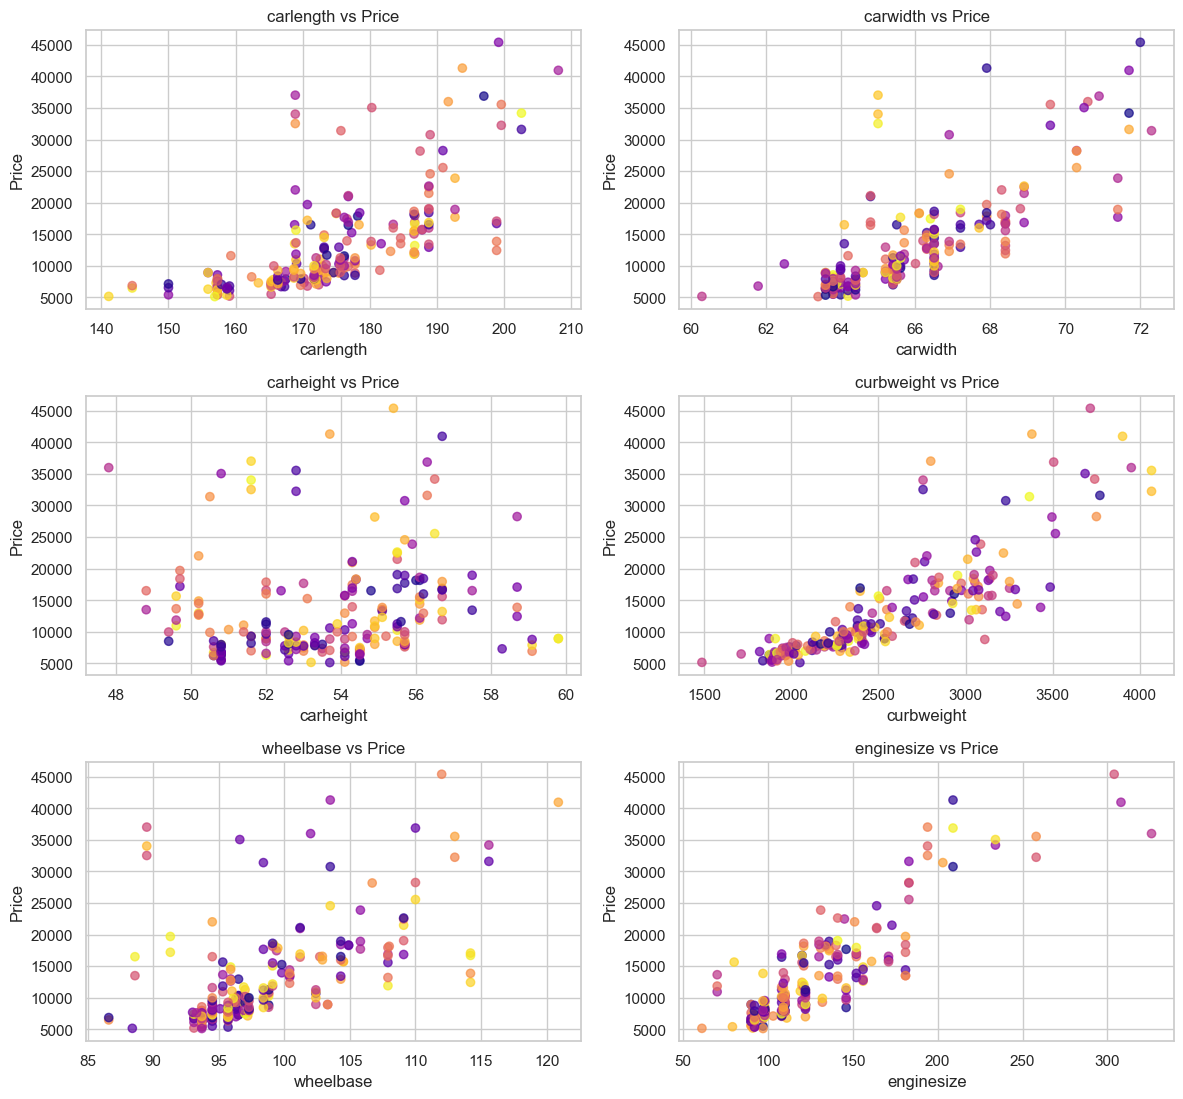

In [18]:
def scatter(x, fig):
    colors = np.random.rand(cars.shape[0])
    plt.subplot(5, 2, fig)
    plt.scatter(cars[x], cars['price'], c=colors, alpha=0.7, cmap='plasma')
    plt.title(x + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(12, 18))

scatter('carlength', 1)
scatter('carwidth', 2)
scatter('carheight', 3)
scatter('curbweight', 4)
scatter('wheelbase', 5)
scatter('enginesize', 6)

plt.tight_layout()
plt.show()


Here are some insights based on the scatter plots:

1. Car Length vs. Price:

Longer cars generally have a wider price range.
There is a positive correlation between car length and price.

2. Car Width vs. Price:

Cars with greater width tend to have higher prices.
There is a positive correlation between car width and price.

3. Car Height vs. Price:

Car height does not show a strong correlation with price.
There is a wide price distribution for different car heights.

4. Curb Weight vs. Price:

Heavier cars generally have higher prices.
There is a positive correlation between curb weight and price.

5. Wheelbase vs. Price:

Longer wheelbases tend to have higher prices.
There is a positive correlation between wheelbase and price.

6. Engine Size vs. Price:

Cars with larger engine sizes tend to have higher prices.
There is a positive correlation between engine size and price.

In [19]:
# List of significant variables
significant_variables = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber',
                           'drivewheel', 'curbweight', 'carlength', 'carwidth', 'enginesize',
                           'boreratio', 'horsepower', 'wheelbase', 'price']

# Create a new dataframe with only the significant variables
selected_cars = cars[significant_variables].copy()

# Display the new dataframe
selected_cars.head()


,enginetype,fueltype,carbody,aspiration,cylindernumber,drivewheel,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price
0,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,13495.0
1,dohc,gas,convertible,std,four,rwd,2548,168.8,64.1,130,3.47,111,88.6,16500.0
2,ohcv,gas,hatchback,std,six,rwd,2823,171.2,65.5,152,2.68,154,94.5,16500.0
3,ohc,gas,sedan,std,four,fwd,2337,176.6,66.2,109,3.19,102,99.8,13950.0
4,ohc,gas,sedan,std,five,4wd,2824,176.6,66.4,136,3.19,115,99.4,17450.0


# Dummy Variables

In [20]:
# Create dummy variables for categorical columns
dummy_columns = ['enginetype', 'fueltype', 'carbody', 'aspiration', 'cylindernumber', 'drivewheel']
selected_cars= pd.get_dummies(selected_cars, columns=dummy_columns, drop_first=True)

# Display the new dataframe with dummy variables
selected_cars.head()


,curbweight,carlength,carwidth,enginesize,boreratio,horsepower,wheelbase,price,enginetype_dohcv,enginetype_l,...,carbody_wagon,aspiration_turbo,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,drivewheel_fwd,drivewheel_rwd
0,2548,168.8,64.1,130,3.47,111,88.6,13495.0,False,False,...,False,False,False,True,False,False,False,False,False,True
1,2548,168.8,64.1,130,3.47,111,88.6,16500.0,False,False,...,False,False,False,True,False,False,False,False,False,True
2,2823,171.2,65.5,152,2.68,154,94.5,16500.0,False,False,...,False,False,False,False,True,False,False,False,False,True
3,2337,176.6,66.2,109,3.19,102,99.8,13950.0,False,False,...,False,False,False,True,False,False,False,False,True,False
4,2824,176.6,66.4,136,3.19,115,99.4,17450.0,False,False,...,False,False,True,False,False,False,False,False,False,False


In [21]:
selected_cars.shape

(205, 28)

In [22]:
selected_cars.columns


Index(['curbweight', 'carlength', 'carwidth', 'enginesize', 'boreratio',
       'horsepower', 'wheelbase', 'price', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'fueltype_gas', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon',
       'aspiration_turbo', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'drivewheel_fwd', 'drivewheel_rwd'],
      dtype='object')

# Train-Test Split and feature scaling


In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Features (X) and Target variable (y)
X = selected_cars.drop('price', axis=1)
y = selected_cars['price']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Display the scaled features
X_train_scaled[:5]  # Displaying the first 5 rows for reference


array([[ 0.28128677,  0.07244984,  0.08381686,  0.18801047,  0.4058361 ,
        -0.81538553,  1.03708546, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473, -3.15171911, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [ 1.01604452,  1.04391556,  1.17026768, -0.15899277,  0.51738434,
        -0.24189416,  1.54123134, -0.07832604,  3.72948936, -1.55456318,
        -0.26813322, -0.2548236 , -0.13650473,  0.31728716, -0.17733173,
        -0.7200823 ,  1.05003052, -0.36198685, -0.46348119, -0.19487094,
         0.51140831, -0.372678  ,  0.        , -0.07832604, -0.13650473,
        -1.17337615,  1.26616531],
       [-0.54164191, -0.36761583, -1.09710795, -0.85299925, -1.00710835,
        -1.0647296 , -0.50896191, -0.07832604, -0.26813322,  0.64326752,
        -0.26813322, -0.2548236 , -0.13650473,  0.3172

# Model Building

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Create a linear regression model
model = LinearRegression()

# Train the model on the scaled training data
model.fit(X_train_scaled, y_train)

LinearRegression()

# Make predictions on the scaled test data

In [26]:
y_pred = model.predict(X_test_scaled)




# Evaluate the model


In [27]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared (R2): {r2}')

Mean Squared Error (MSE): 10209920.152417809
R-squared (R2): 0.8706688608123747


# the actual prices (y-test) vs. the predicted prices (y-predict)

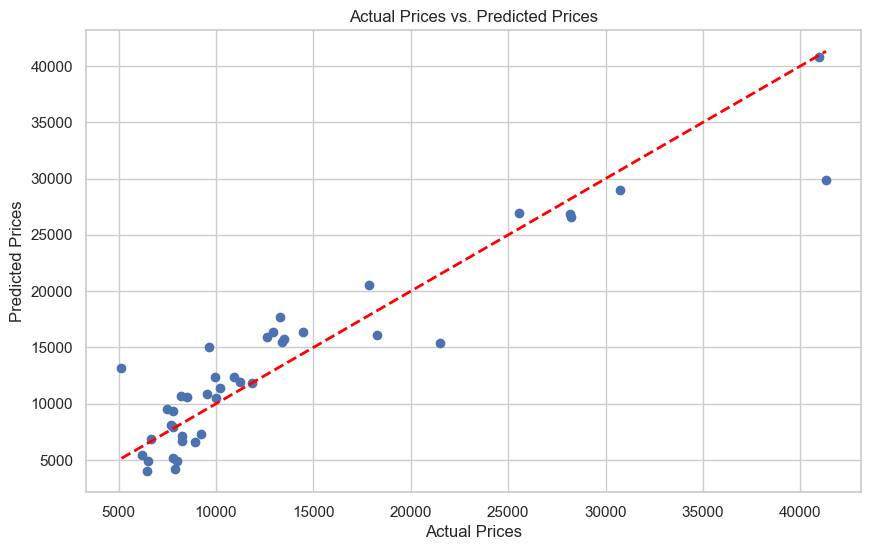

In [28]:
# Assuming 'y_test' is the actual prices and 'y_pred' is the predicted prices
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)  # Diagonal line for reference
plt.title('Actual Prices vs. Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.show()


- Linear Relationship: If the points are clustered closely around the diagonal red dashed line, it indicates a strong linear relationship between actual and predicted prices. This suggests that the linear regression model is performing well.

- Model Accuracy: The closer the points are to the diagonal line, the more accurate the model predictions are. Deviations from the line may indicate areas where the model overestimates or underestimates prices.

- Outliers: Identify any outliers where the predicted prices deviate significantly from the actual prices. Outliers may represent instances where the model struggles to make accurate predictions.

- Pattern Analysis: Look for patterns in the residuals (vertical distances between points and the diagonal line). A random scattering of points suggests that the model captures the underlying patterns well.

- Homoscedasticity: Assess the spread of points along the line. Homoscedasticity (constant variance) is desirable, while heteroscedasticity (changing variance) may indicate issues with the model.

- Performance Evaluation: Compare the scatter plot with other evaluation metrics like Mean Squared Error (MSE) or R-squared to get a comprehensive view of model performance.